In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pylab as plt
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 5, 20)

In [3]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
ford = web.DataReader('FORD', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)

In [6]:
print('\nTesla',tesla.head(5))
print('\nFord',ford.head(5))
print('\nGm',gm.head(5))


Tesla              High    Low   Open  Close     Volume  Adj Close
Date                                                        
2012-01-03  5.900  5.530  5.788  5.616  4640500.0      5.616
2012-01-04  5.734  5.500  5.642  5.542  3150500.0      5.542
2012-01-05  5.586  5.370  5.552  5.424  5027500.0      5.424
2012-01-06  5.558  5.282  5.440  5.382  4931500.0      5.382
2012-01-09  5.498  5.224  5.400  5.450  4485000.0      5.450

Ford             High   Low  Open  Close  Volume  Adj Close
Date                                                  
2012-01-03  1.70  1.65  1.69   1.67   16700       1.67
2012-01-04  1.71  1.65  1.68   1.66    5600       1.66
2012-01-05  1.69  1.65  1.65   1.67    9200       1.67
2012-01-06  1.69  1.66  1.68   1.67    9800       1.67
2012-01-09  1.75  1.68  1.72   1.75   34500       1.75

Gm                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  21.

# Візуалізація

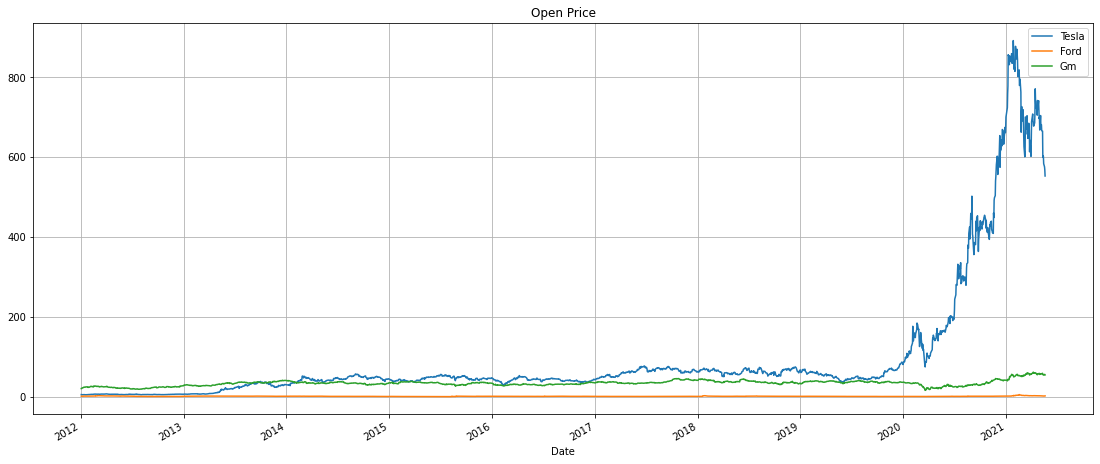

In [7]:
# Візуалізація відкриттів цін
tesla['Open'].plot(label='Tesla', figsize=(19, 8), title='Open Price')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='Gm')
plt.legend()
plt.grid()
plt.show()

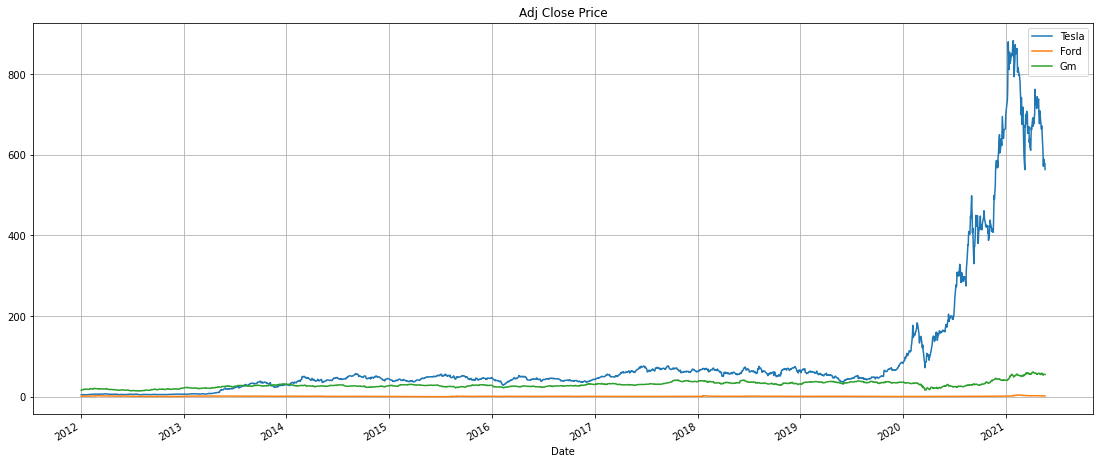

In [8]:
# Візуалізація закриття цін
tesla['Adj Close'].plot(label='Tesla',figsize=(19, 8), title='Adj Close Price')
ford['Adj Close'].plot(label='Ford')
gm['Adj Close'].plot(label='Gm')
plt.legend()
plt.grid()
plt.show()

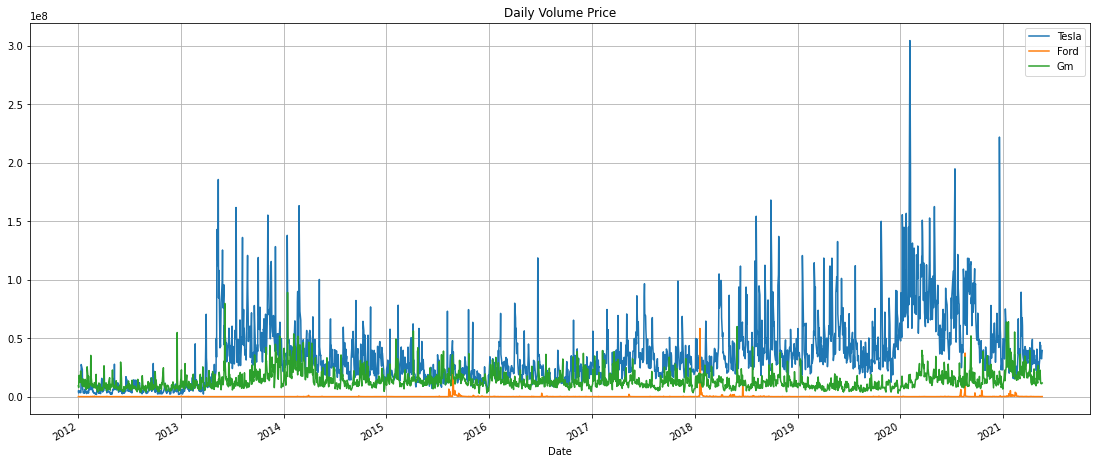

In [9]:
# Візуалізація щоденного випуску
tesla['Volume'].plot(label='Tesla',figsize=(19, 8), title='Daily Volume Price')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='Gm')
plt.legend()
plt.grid()
plt.show()

In [12]:
tesla['Volume'].idxmax()

Timestamp('2020-02-04 00:00:00')

In [13]:
ford['Volume'].idxmax()

Timestamp('2018-01-19 00:00:00')

In [14]:
gm['Volume'].idxmax()

Timestamp('2014-01-15 00:00:00')

# Виторг

In [15]:
tesla['Total Traded'] = tesla['Volume']*tesla['Open']
ford['Total Traded'] = ford['Volume']*ford['Open']
gm['Total Traded'] = gm['Volume']*gm['Open']

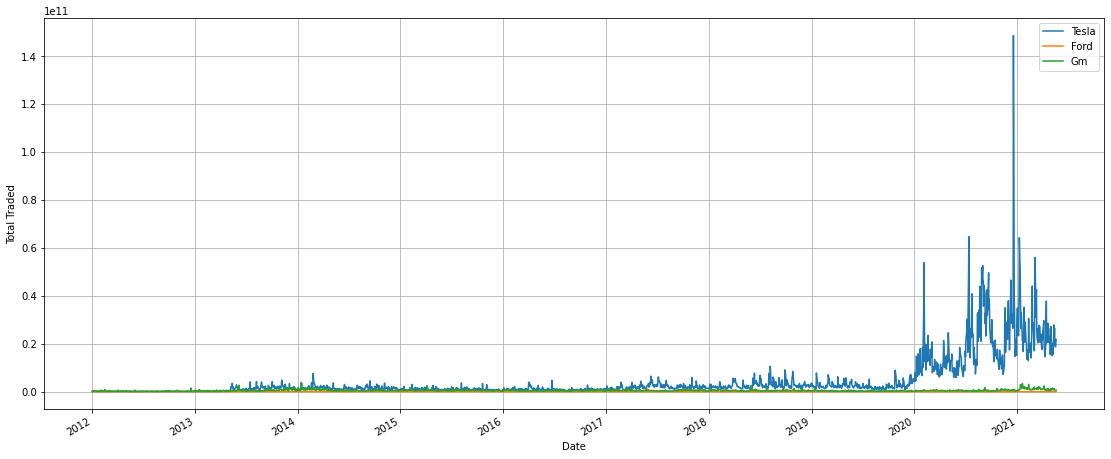

In [19]:
tesla['Total Traded'].plot(label='Tesla',figsize=(19, 8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='Gm')
plt.legend()
plt.ylabel('Total Traded')
plt.grid()
plt.show()

In [20]:
tesla['Total Traded'].idxmax()

Timestamp('2020-12-18 00:00:00')

# Moving Averages

Text(0.5, 1.0, 'Moving Averages')

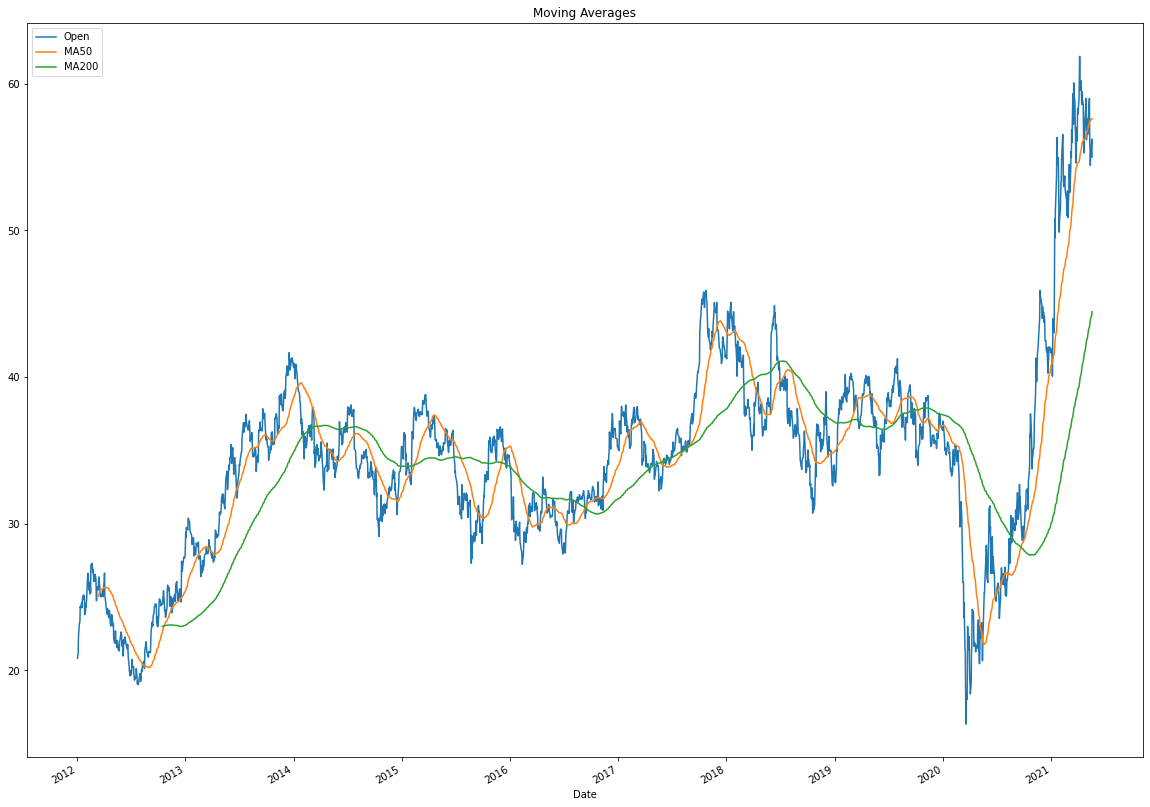

In [24]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(label='GM', figsize = (20,15))
plt.title('Moving Averages')


# Діаграми розкиду для всіх цін на закриття акцій

In [25]:
from pandas.plotting import scatter_matrix

c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Tesla Close', ylabel='Tesla Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='Tesla Close'>,
        <AxesSubplot:xlabel='Gm Close', ylabel='Tesla Close'>],
       [<AxesSubplot:xlabel='Tesla Close', ylabel='Ford Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='Ford Close'>,
        <AxesSubplot:xlabel='Gm Close', ylabel='Ford Close'>],
       [<AxesSubplot:xlabel='Tesla Close', ylabel='Gm Close'>,
        <AxesSubplot:xlabel='Ford Close', ylabel='Gm Close'>,
        <AxesSubplot:xlabel='Gm Close', ylabel='Gm Close'>]], dtype=object)

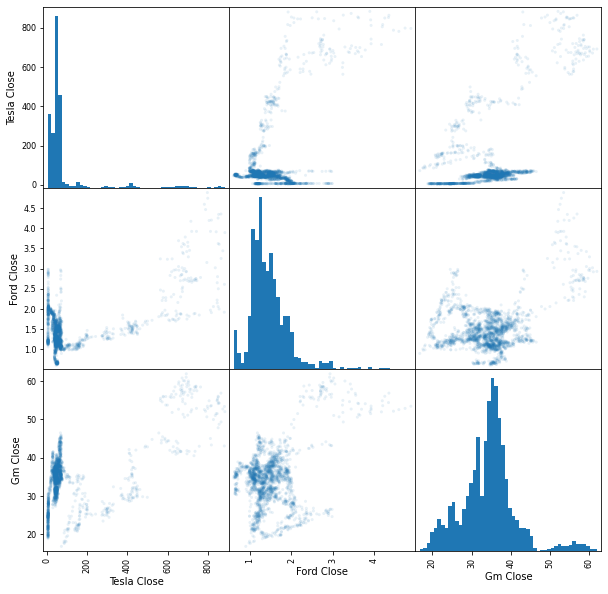

In [27]:
car_comp = pd.concat([tesla['Close'],ford['Close'],gm['Close']],axis = 1)
car_comp.columns = ['Tesla Close', 'Ford Close', 'Gm Close']
scatter_matrix(car_comp, figsize = (10,10), alpha = .1, hist_kwds ={'bins':50})

In [45]:
DOGE_USD = web.DataReader('BTC-USD', 'yahoo', start, end)
print('\nDOGE-USD',DOGE_USD.head(5))


DOGE-USD                   High         Low        Open       Close      Volume  \
Date                                                                     
2014-09-16  468.174011  452.421997  465.864014  457.334015  21056800.0   
2014-09-17  456.859985  413.104004  456.859985  424.440002  34483200.0   
2014-09-18  427.834991  384.532013  424.102997  394.795990  37919700.0   
2014-09-19  423.295990  389.882996  394.673004  408.903992  36863600.0   
2014-09-20  412.425995  393.181000  408.084991  398.821014  26580100.0   

             Adj Close  
Date                    
2014-09-16  457.334015  
2014-09-17  424.440002  
2014-09-18  394.795990  
2014-09-19  408.903992  
2014-09-20  398.821014  


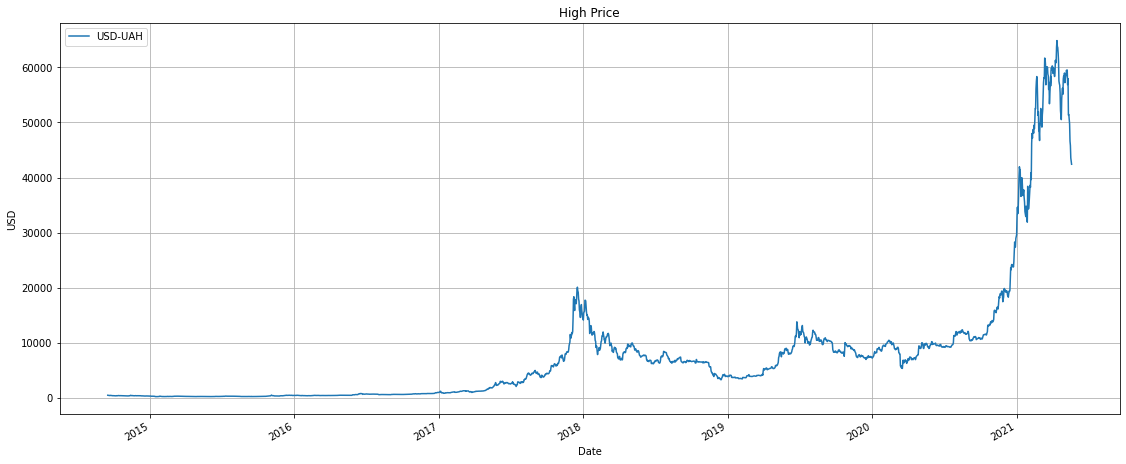

In [46]:
# Візуалізація відкриттів цін
DOGE_USD['High'].plot(label='USD-UAH', figsize=(19, 8), title='High Price')
plt.legend()
plt.ylabel('USD')
plt.grid()
plt.show()